<a href="https://colab.research.google.com/github/spandana2004/new/blob/main/Copy_of_Copy_of_Trend_in_placement_final_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Student-Employability-Datasets.xlsx")
df.shape

(2982, 10)

In [ ]:
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [ ]:
df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
new_df = df.drop(
    columns = [
        'CLASS',
        'Name of Student',
        'Student Performance Rating'
    ]
)

total = pd.DataFrame({
    'Skills' : new_df.columns,
    'Total Value' : new_df.sum()
})

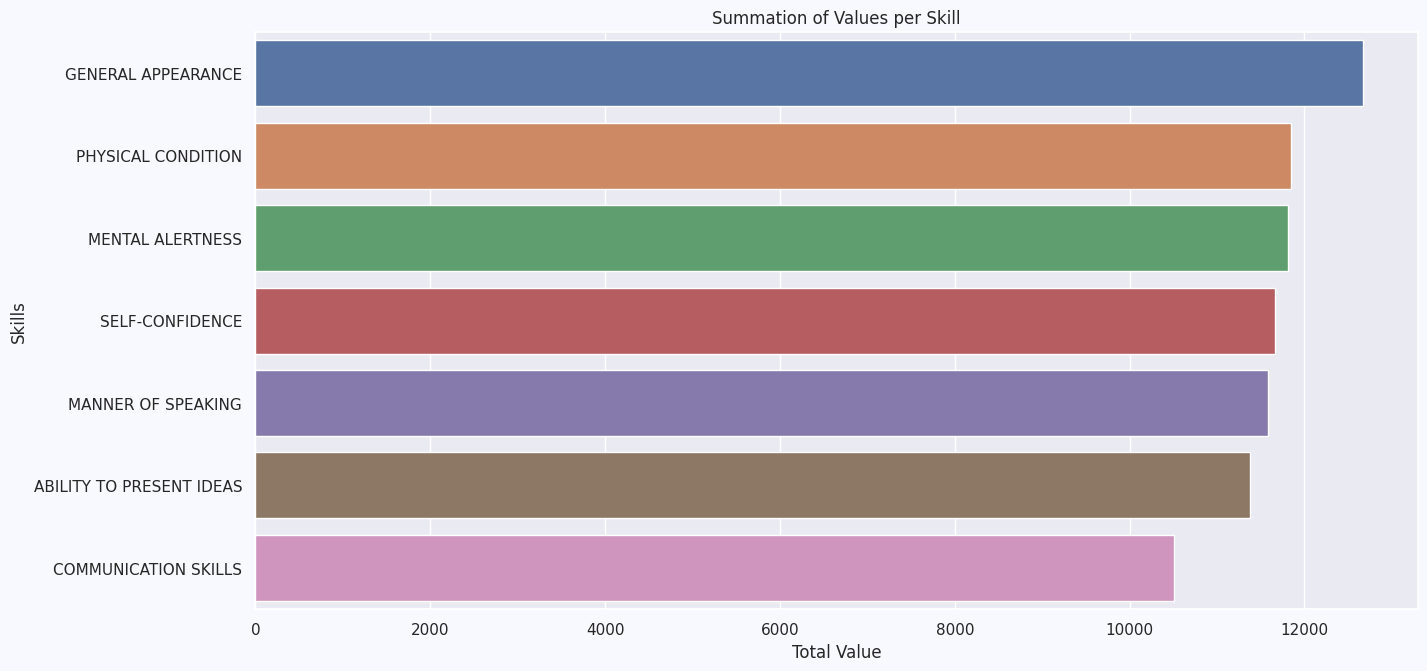

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

ax = sns.barplot(
    y = 'Skills',
    x='Total Value',
    data = total.sort_values(
        'Total Value',
        ascending = False
    )
)

plt.title('Summation of Values per Skill')
plt.show()

In [ ]:
df_employed = df.loc[df['CLASS'] == 'Employable']

df_employed = df_employed.drop(columns = ['Name of Student','CLASS'])

ave_skills = pd.DataFrame({
    'Average Score' : df_employed.mean()
})

ave_skills

,Average Score
GENERAL APPEARANCE,4.314054
MANNER OF SPEAKING,4.012146
PHYSICAL CONDITION,4.076345
MENTAL ALERTNESS,4.097744
SELF-CONFIDENCE,4.008097
ABILITY TO PRESENT IDEAS,3.887796
COMMUNICATION SKILLS,3.609601
Student Performance Rating,4.610179


In [ ]:
df_employed.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
4,4,4,3,3,4,4,3,5
5,4,4,3,3,3,3,3,5
6,4,4,4,3,3,3,3,3


In [ ]:
pie_data = ave_skills.drop(index = ['Student Performance Rating'], axis = 0)
pie_data

,Average Score
GENERAL APPEARANCE,4.314054
MANNER OF SPEAKING,4.012146
PHYSICAL CONDITION,4.076345
MENTAL ALERTNESS,4.097744
SELF-CONFIDENCE,4.008097
ABILITY TO PRESENT IDEAS,3.887796
COMMUNICATION SKILLS,3.609601


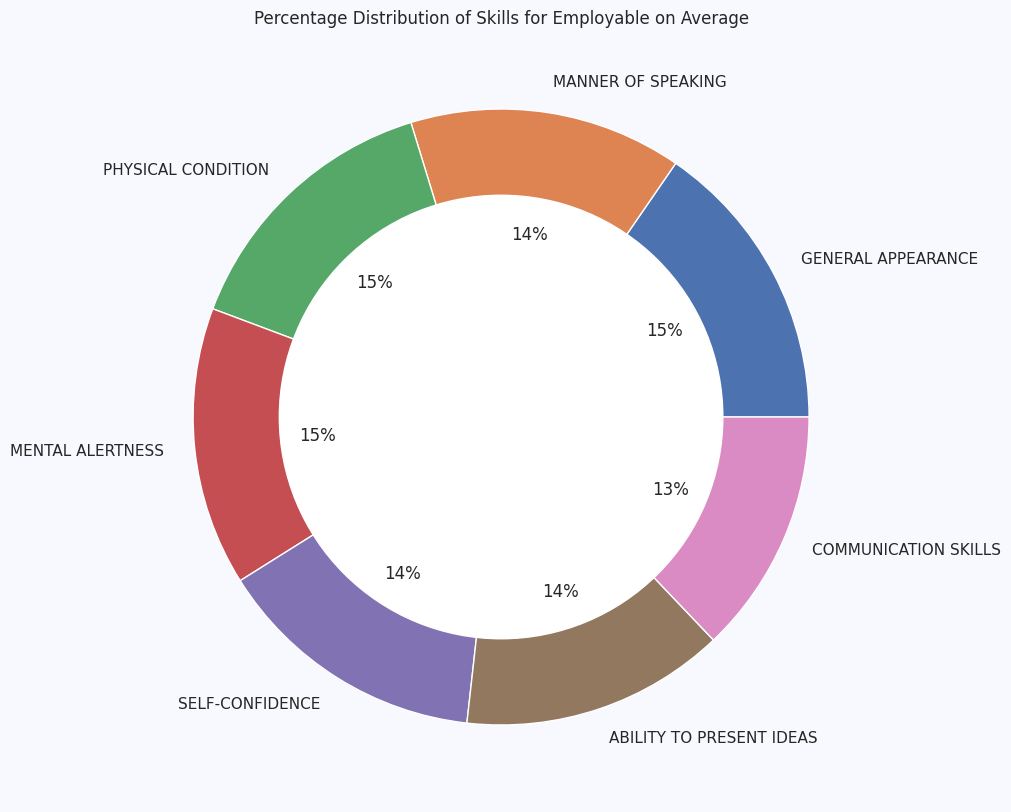

In [ ]:
palette_color = sns.color_palette(palette = 'deep')

fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('ghostwhite')

plt.pie(
    pie_data['Average Score'],
    labels = pie_data.index,
    colors = palette_color,
    autopct = '%.0f%%'
)

centre_circle = plt.Circle((0, 0), 0.72, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage Distribution of Skills for Employable on Average')
plt.show()

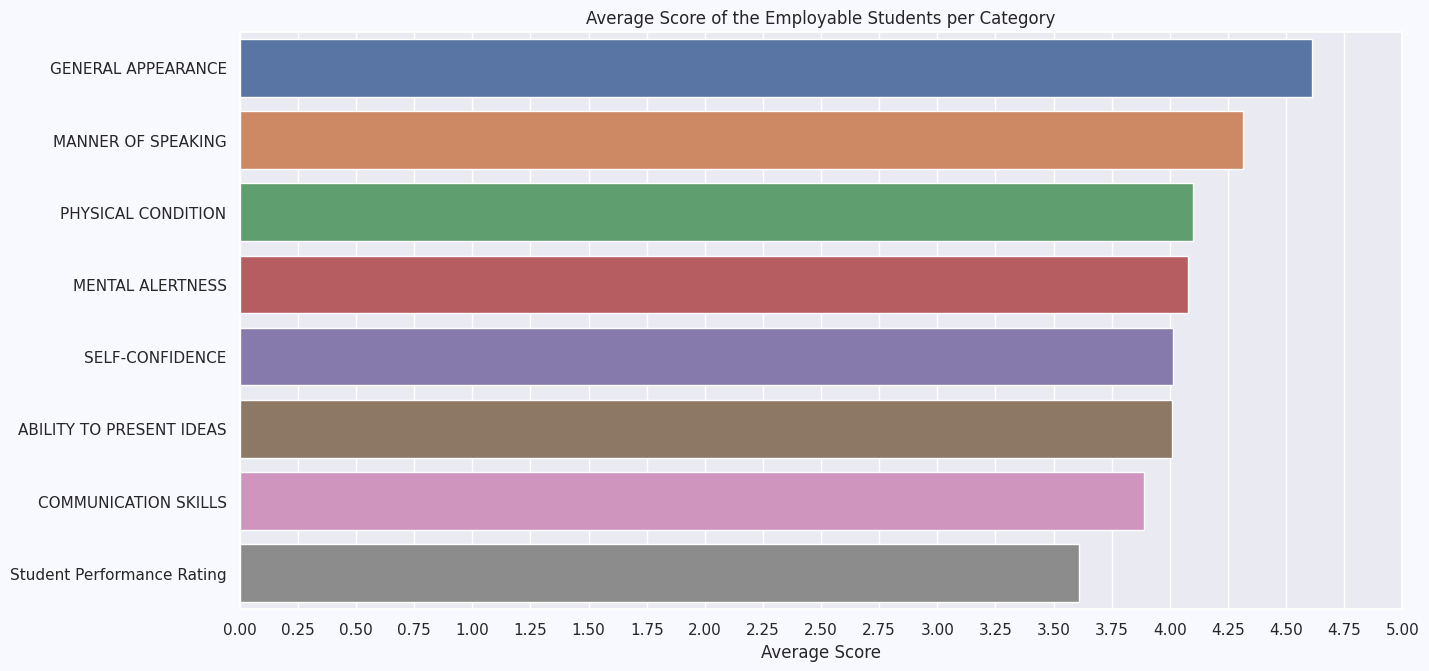

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y = ave_skills.index,
    x= 'Average Score',
    data = ave_skills.sort_values(
        'Average Score',
        ascending = False
    )
)

plt.xticks(np.arange(0,5.25,0.25))
plt.title('Average Score of the Employable Students per Category')
plt.show()

In [ ]:
df_ave = pd.DataFrame({
    'Student' : df['Name of Student'].loc[df['CLASS'] == 'Employable'],
    'Average Score': df.loc[df['CLASS'] == 'Employable']\
    ._get_numeric_data().mean(axis = 1)
})

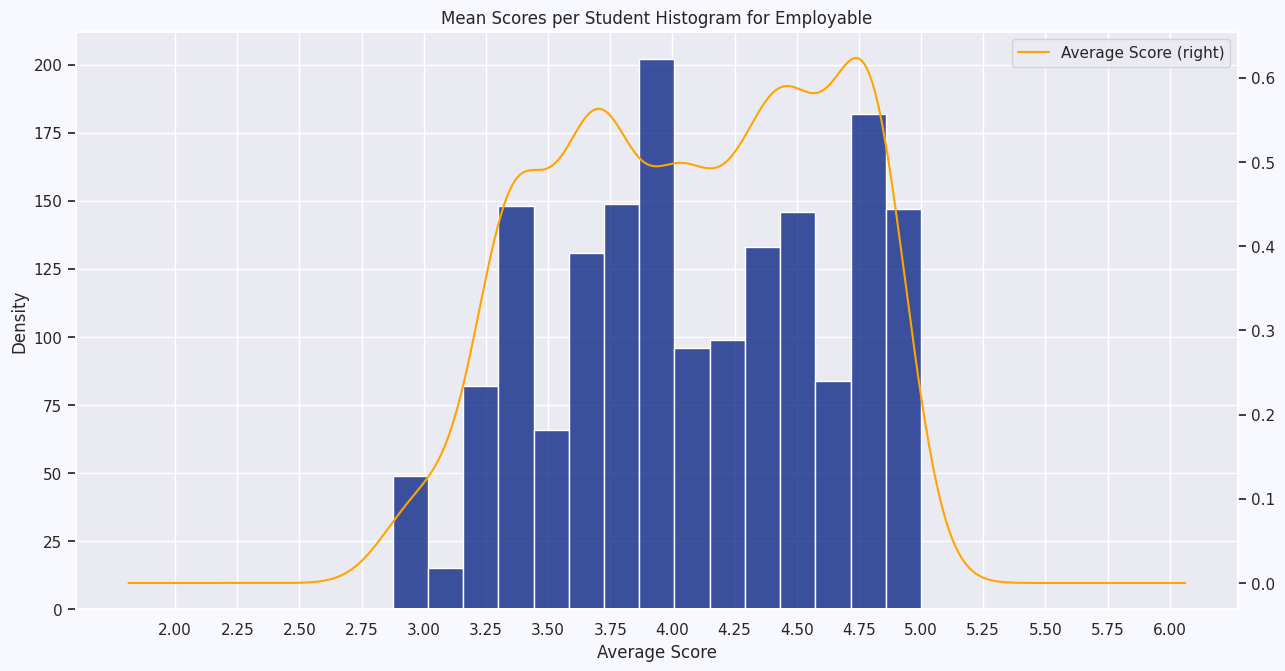

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style='darkgrid', palette = 'dark')

ax = sns.histplot(
    x = 'Average Score',
    data = df_ave
)

df_ave.plot(
    kind='kde',
    ax=ax,
    secondary_y=True,
    color = 'orange'
)

plt.xticks(np.arange(2,6.25,0.25))
plt.title('Mean Scores per Student Histogram for Employable')
plt.show()

In [ ]:
df_less = df.loc[df['CLASS'] == 'LessEmployable']\
.drop(columns = ['CLASS', 'Name of Student'])

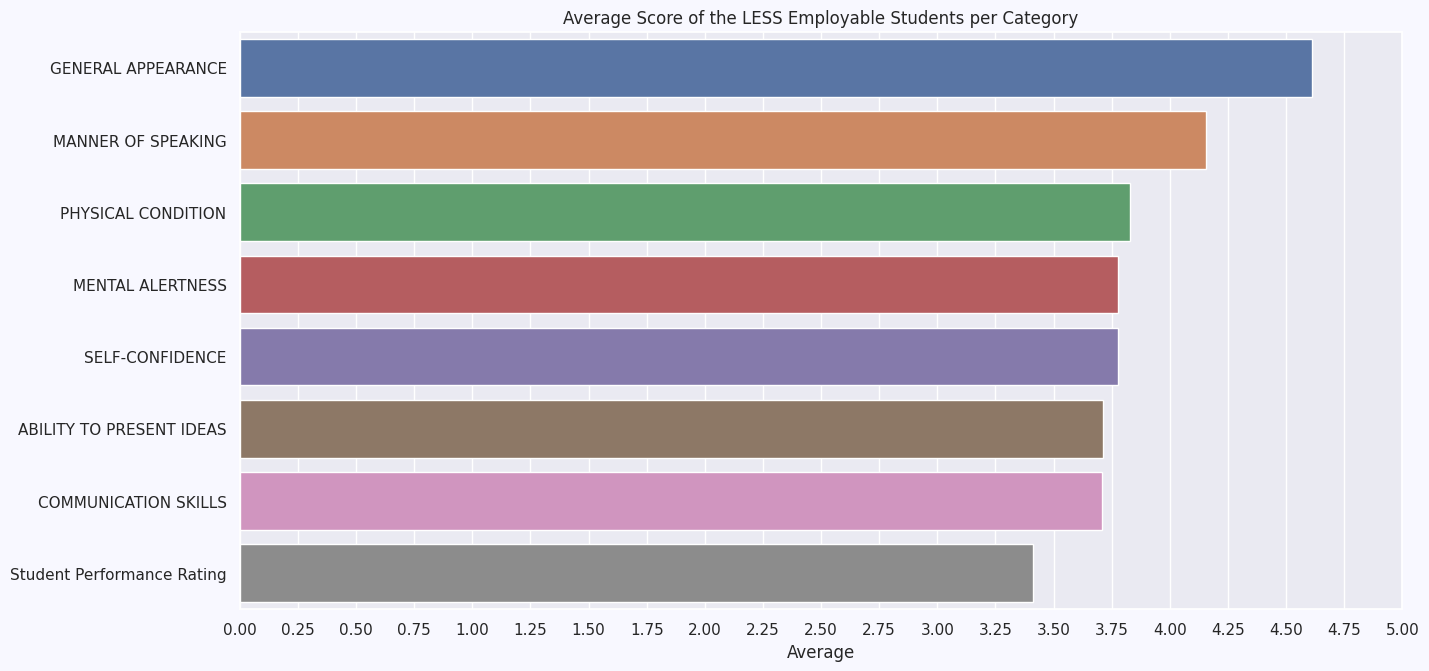

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

less_ave_skills = pd.DataFrame({
    'Average' : df_less.mean()
})

sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y = less_ave_skills.index,
    x= 'Average',
    data = less_ave_skills.sort_values(
        'Average',
        ascending = False
    )
)

plt.xticks(np.arange(0,5.25,0.25))
plt.title('Average Score of the LESS Employable Students per Category')
plt.show()

In [ ]:
df_ave_less = pd.DataFrame({
    'Student' : df['Name of Student'].loc[
        df['CLASS'] == 'LessEmployable'
    ],
    'Average Score': df.loc[
        df['CLASS'] == 'LessEmployable'
    ]._get_numeric_data().mean(axis = 1)
})

df_ave_less.head()

,Student,Average Score
2,Student 3,3.250
3,Student 4,3.125
10,Student 11,4.875
12,Student 13,3.125
13,Student 14,2.875


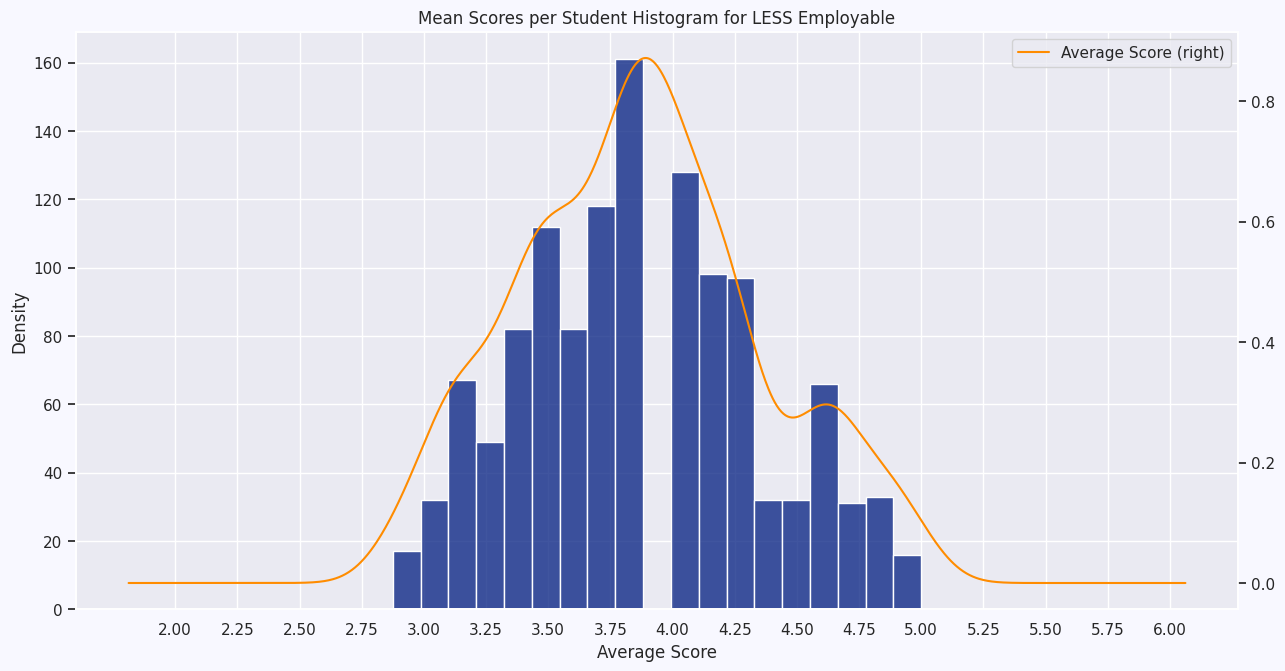

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style='darkgrid', palette = 'dark')

ax = sns.histplot(
    x = 'Average Score',
    data = df_ave_less
)

df_ave_less.plot(
    kind='kde',
    ax=ax,
    secondary_y=True,
    color = 'darkorange'
)

plt.xticks(np.arange(2,6.25,0.25))
plt.title('Mean Scores per Student Histogram for LESS Employable')
plt.show()

In [ ]:
print('LESS EMPLOYABLE STUDENTS')
df_less.loc[df_ave_less['Average Score'] > 3.5].head(10)

LESS EMPLOYABLE STUDENTS


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
10,5,5,5,5,5,5,4,5
14,4,4,3,4,4,4,3,5
17,4,4,4,4,4,4,4,5
18,4,4,4,5,5,4,4,5
19,4,3,3,4,5,4,3,5
30,4,3,4,4,3,4,3,5
32,5,5,4,5,5,4,4,5
33,4,4,4,5,5,4,3,5
43,4,3,4,3,4,3,3,5
44,5,4,5,5,4,4,4,5


In [ ]:
print('EMPLOYABLE STUDENTS')
df_employed.loc[df_ave['Average Score'] > 3.5].head(10)

EMPLOYABLE STUDENTS


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
4,4,4,3,3,4,4,3,5
7,5,3,3,4,3,3,3,5
8,4,4,4,4,4,4,4,5
9,4,4,3,4,3,4,4,5
11,3,4,4,4,3,4,4,5
20,5,4,5,4,4,4,4,5
21,5,4,4,4,4,4,4,3
22,5,4,5,5,5,5,4,5


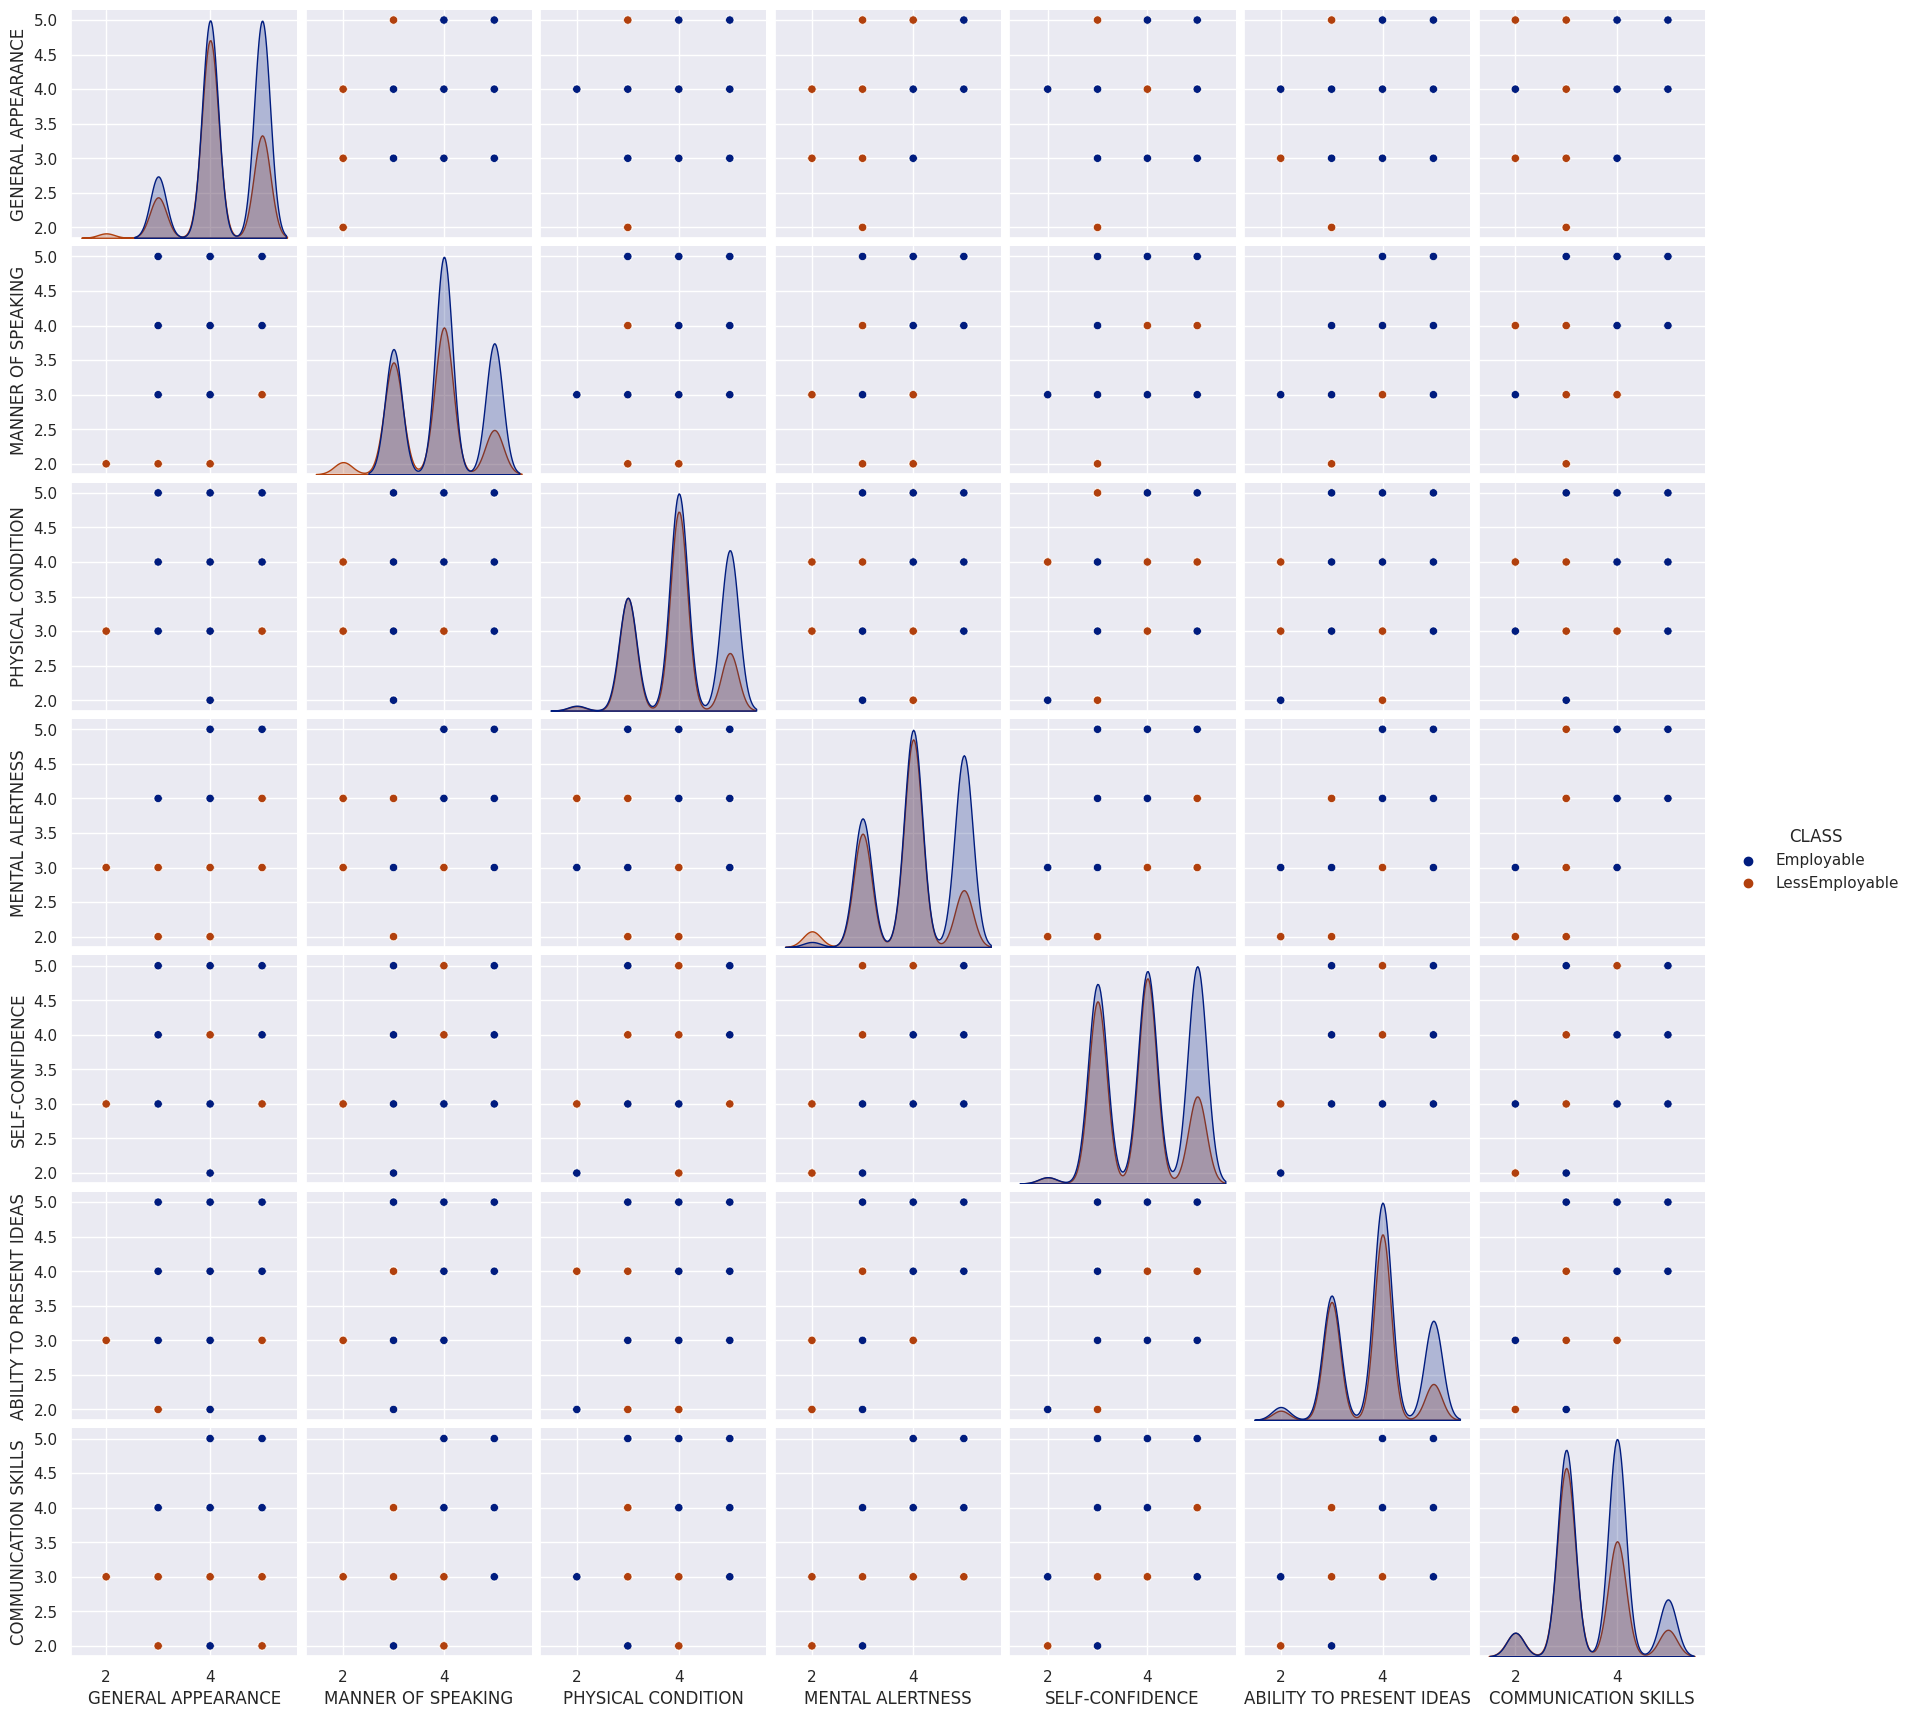

In [ ]:
sns.pairplot(
    vars = [
        'GENERAL APPEARANCE',
        'MANNER OF SPEAKING',
        'PHYSICAL CONDITION',
        'MENTAL ALERTNESS',
        'SELF-CONFIDENCE',
        'ABILITY TO PRESENT IDEAS',
        'COMMUNICATION SKILLS'
    ],
    hue = 'CLASS',
    kind = 'scatter',
    data = df
)

plt.show()

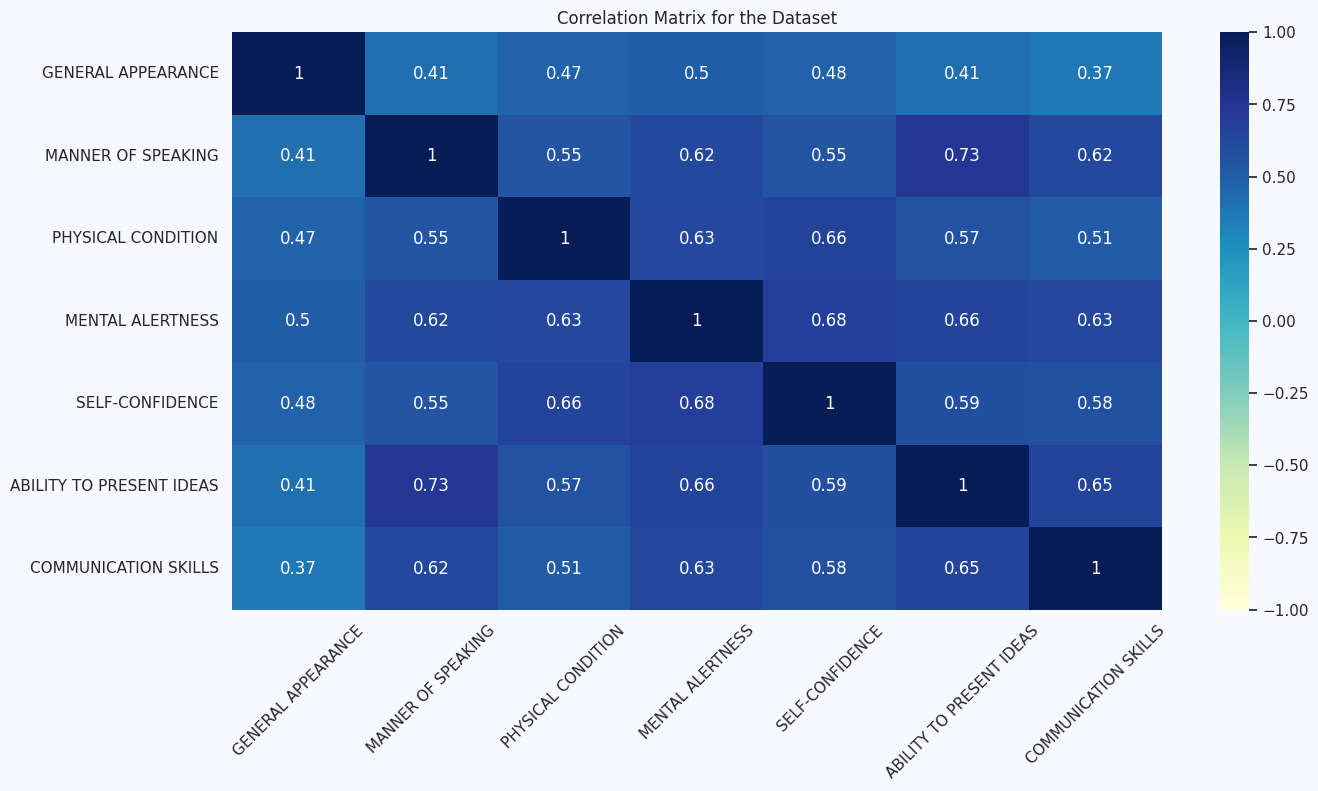

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

ax = sns.heatmap(
    df.drop(
        columns = [
            'Name of Student',
            'CLASS',
            'Student Performance Rating'
        ]
    ).corr().round(2),
    annot=True,
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap ='YlGnBu'
)

plt.xticks(rotation = 45)
plt.title("Correlation Matrix for the Dataset")
plt.show()

## MODEL CREATION AND CHECKING FOR ACCURACY FOR MODEL SELECTION

In [ ]:
df['CLASS'] = df['CLASS'].str.replace('LessEmployable', '0')
df['CLASS'] = df['CLASS'].str.replace('Employable', '1')

df['CLASS'].dtypes
df['CLASS']

0       1
1       1
2       0
3       0
4       1
       ..
2977    1
2978    1
2979    1
2980    0
2981    1
Name: CLASS, Length: 2982, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['CLASS'] = df['CLASS'].astype(float)
df

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,1.0
1,Student 2,4,4,4,4,4,4,3,5,1.0
2,Student 3,4,3,3,3,3,3,2,5,0.0
3,Student 4,3,3,3,2,3,3,3,5,0.0
4,Student 5,4,4,3,3,4,4,3,5,1.0
...,...,...,...,...,...,...,...,...,...,...
2977,Student 2996,4,3,3,3,3,3,2,5,1.0
2978,Student 2997,3,4,4,4,4,4,4,5,1.0
2979,Student 2998,4,5,4,5,4,4,4,5,1.0
2980,Student 2999,4,4,4,3,4,4,3,5,0.0


In [ ]:
# Separate features and target
X = df.drop(columns=["CLASS"])  # Features
y = df["CLASS"]  # Target

In [ ]:
chosen_feature = ['Student Performance Rating','GENERAL APPEARANCE','ABILITY TO PRESENT IDEAS','MENTAL ALERTNESS','MANNER OF SPEAKING','PHYSICAL CONDITION','SELF-CONFIDENCE','COMMUNICATION SKILLS']
X_selected = X[chosen_feature]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
clf.fit(X_train.values,y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.08877721943048576
Accuracy: 0.9112227805695142


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.10552763819095477
Accuracy: 0.8944723618090452


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegressionCV(cv=2, random_state=0)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.4053601340033501
Accuracy: 0.5946398659966499


In [ ]:
from sklearn.naive_bayes import CategoricalNB
classifier = CategoricalNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.4120603015075377
Accuracy: 0.5879396984924623


In [ ]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(max_iter=2000, tol=1e-3)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.4120603015075377
Accuracy: 0.5879396984924623


In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.4438860971524288
Accuracy: 0.5561139028475712


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

#without scaling
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.09045226130653267
Accuracy: 0.9095477386934674


In [ ]:
from sklearn.svm import NuSVC
classifier = NuSVC()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.1490787269681742
Accuracy: 0.8509212730318257


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.4438860971524288
Accuracy: 0.5561139028475712


In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.4438860971524288
Accuracy: 0.5561139028475712


In [ ]:
from sklearn.naive_bayes import CategoricalNB
classifier = CategoricalNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.4120603015075377
Accuracy: 0.5879396984924623


In [ ]:
from sklearn.linear_model import Perceptron

classifier = Perceptron(tol=1e-3, random_state=0)
# Without Scaling
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.5561139028475712
Accuracy: 0.4438860971524288


In [ ]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()

#without scaling
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0532036362699104


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

model1 = RandomForestClassifier(random_state=42)
model2 = KNeighborsClassifier(n_neighbors=1)
model3 = DecisionTreeClassifier(random_state=0)


ensemble = VotingClassifier(
    estimators=[('model1', model1), ('model3', model3), ('model2', model2)],
    voting='hard'  # Use 'soft' for weighted voting based on probabilities
)

ensemble = RandomForestClassifier(
    n_estimators=100, # Number of base models
    random_state=42
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")

Ensemble Accuracy: 0.9112227805695142


In [ ]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

# For classification
bagging_classifier = BaggingClassifier(base_estimator = RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Accuracy: 0.9095477386934674


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

# Create individual classifiers
gradient_boosting = GradientBoostingClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

# Create a VotingClassifier with soft voting
voting_classifier = VotingClassifier(estimators=[('gradient_boosting', gradient_boosting), ('adaboost', adaboost)], voting='soft')

# Train the ensemble on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)

# Calculate the accuracy of the VotingClassifier model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8174204355108877


ROUND 1

In [ ]:
chosen_feature = ['GENERAL APPEARANCE','MENTAL ALERTNESS','PHYSICAL CONDITION','SELF-CONFIDENCE',]
X_selected = X[chosen_feature]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

model1 = RandomForestClassifier(random_state=42)
model2 = KNeighborsClassifier(n_neighbors=1)
model3 = DecisionTreeClassifier(random_state=0)


ensemble = VotingClassifier(
    estimators=[('model1', model1), ('model3', model3)],
    voting='hard'  # Use 'soft' for weighted voting based on probabilities
)

ensemble = RandomForestClassifier(
    n_estimators=100, # Number of base models
    random_state=42
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")

Ensemble Accuracy: 0.7504187604690117


In [ ]:
y_train_pred = ensemble.predict(X_train)

In [ ]:
for i in range(len(y_train)):
  print(f"Actual: {y_train.iloc[i]}, Predicted: {y_train_pred[i]}")

Actual: 1.0, Predicted: 0.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 0.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 0.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predict

In [ ]:
# Assuming you have y_test and y_pred from previous code
y_pred_zeros = y_test[y_pred == 0]

# Count the number of instances with predicted value 0
num_zeros = len(y_pred_zeros)

print(f"Number of instances with predicted value 0: {num_zeros}")

Number of instances with predicted value 0: 218


In [ ]:
# Create a DataFrame with X_test, y_test, and y_pred
test_data = pd.DataFrame(data=X_test, columns=X_test.columns)
test_data["actual"] = y_test
test_data["predicted"] = y_pred

# Group instances with predicted value 0
grouped_less_emp_round1 = test_data[test_data["predicted"] == 0]
r1_emp = pd.DataFrame()
r1_emp.to_excel("Round 1 emp.xlsx")

# Group instances with predicted value 1
grouped_emp_round1 = test_data[test_data["predicted"] == 1]

# Display the grouped instances
print(grouped_less_emp_round1)

      GENERAL APPEARANCE  MENTAL ALERTNESS  PHYSICAL CONDITION  \
331                    5                 3                   4   
1242                   4                 4                   2   
1953                   4                 4                   3   
1271                   4                 5                   5   
2118                   3                 4                   4   
...                  ...               ...                 ...   
212                    4                 4                   4   
12                     4                 2                   3   
999                    3                 3                   3   
1868                   4                 4                   4   
1429                   5                 3                   3   

      SELF-CONFIDENCE  actual  predicted  
331                 3     0.0        0.0  
1242                3     0.0        0.0  
1953                4     0.0        0.0  
1271                4     1.0      

In [ ]:
ave_skills = pd.DataFrame({
    'Average Score' : grouped_less_emp_round1.mean()
})

ave_skills

,Average Score
GENERAL APPEARANCE,3.944954
MENTAL ALERTNESS,3.637615
PHYSICAL CONDITION,3.614679
SELF-CONFIDENCE,3.509174
actual,0.233945
predicted,0.000000


In [ ]:
ave_skills = ave_skills.drop(index = ['actual'], axis = 0)
ave_skills = ave_skills.drop(index = ['predicted'], axis = 0)

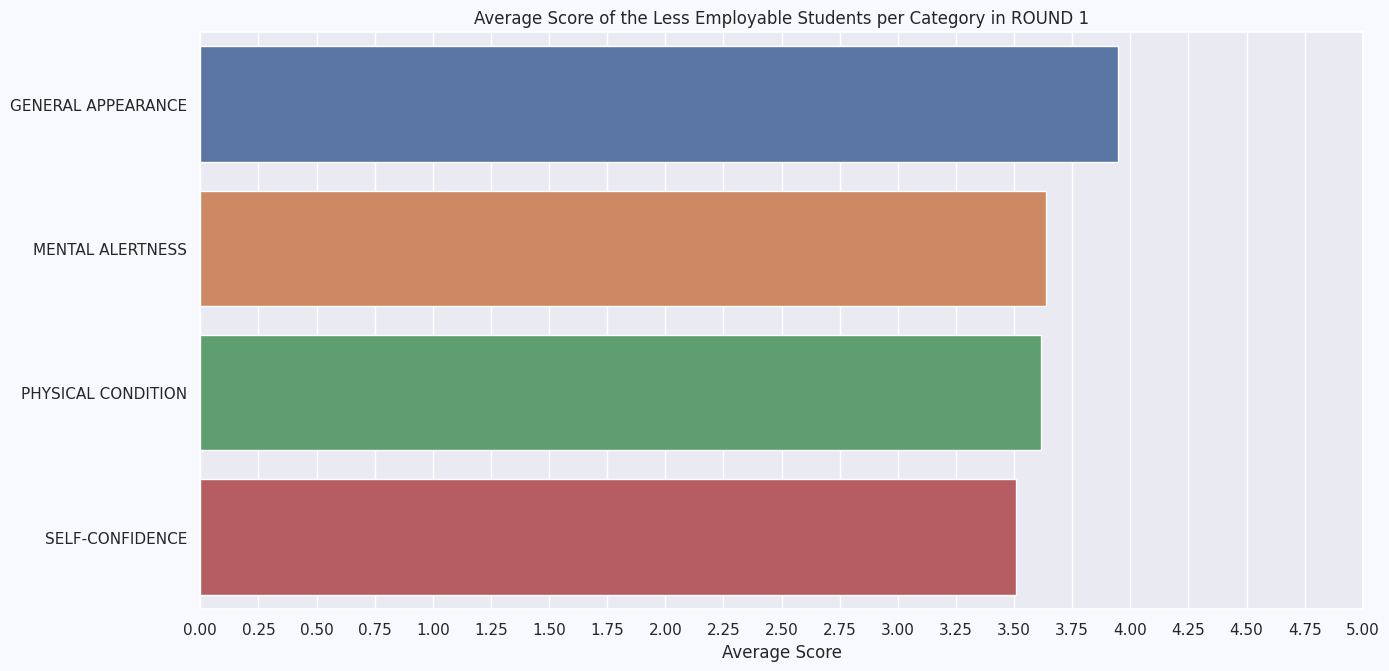

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y = ave_skills.index,
    x= 'Average Score',
    data = ave_skills.sort_values(
        'Average Score',
        ascending = False
    )
)

plt.xticks(np.arange(0,5.25,0.25))
plt.title('Average Score of the Less Employable Students per Category in ROUND 1')
plt.show()

ROUND 2

In [ ]:
grouped_emp_round1["Student Performance Rating"] = df["Student Performance Rating"]
grouped_emp_round1["COMMUNICATION SKILLS"] = df["COMMUNICATION SKILLS"]
grouped_emp_round1["MANNER OF SPEAKING"] = df["MANNER OF SPEAKING"]
grouped_emp_round1["ABILITY TO PRESENT IDEAS"] = df["ABILITY TO PRESENT IDEAS"]
grouped_emp_round1

<ipython-input-133-822173f12d37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_emp_round1["Student Performance Rating"] = df["Student Performance Rating"]
<ipython-input-133-822173f12d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_emp_round1["COMMUNICATION SKILLS"] = df["COMMUNICATION SKILLS"]
<ipython-input-133-822173f12d37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,GENERAL APPEARANCE,MENTAL ALERTNESS,PHYSICAL CONDITION,SELF-CONFIDENCE,actual,predicted,Student Performance Rating,COMMUNICATION SKILLS,MANNER OF SPEAKING,ABILITY TO PRESENT IDEAS
2409,4,3,4,3,1.0,1.0,5,3,4,3
1547,4,4,4,4,0.0,1.0,5,4,4,4
881,5,5,5,5,0.0,1.0,5,5,5,5
2225,4,4,4,5,0.0,1.0,5,4,4,4
678,5,5,5,5,0.0,1.0,5,4,5,5
...,...,...,...,...,...,...,...,...,...,...
2465,5,5,5,5,1.0,1.0,5,4,4,5
1551,4,3,4,3,1.0,1.0,5,3,3,3
1032,5,5,5,5,1.0,1.0,5,3,5,5
422,4,3,3,3,1.0,1.0,5,3,3,3


In [ ]:
chosen_feature = ['Student Performance Rating','ABILITY TO PRESENT IDEAS','MANNER OF SPEAKING','COMMUNICATION SKILLS']  # Replace with the name of the feature you want to choose
X_selected = X[chosen_feature]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

model1 = RandomForestClassifier(random_state=42)
model2 = KNeighborsClassifier(n_neighbors=1)
model3 = DecisionTreeClassifier(random_state=0)


ensemble = VotingClassifier(
    estimators=[('model1', model1), ('model3', model3), ('model2', model2)],
    voting='hard'  # Use 'soft' for weighted voting based on probabilities
)

ensemble = RandomForestClassifier(
    n_estimators=100, # Number of base models
    random_state=42
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")

Ensemble Accuracy: 0.7085427135678392


In [ ]:
y_train_pred = ensemble.predict(X_train)

In [ ]:
for i in range(len(y_train)):
  print(f"Actual: {y_train.iloc[i]}, Predicted: {y_train_pred[i]}")

Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 0.0, Predicted: 0.0
Actual: 0.0, Predicted: 0.0
Actual: 1.0, Predicted: 1.0
Actual: 0.0, Predicted: 1.0
Actual: 1.0, Predict

In [ ]:
# Assuming you have y_test and y_pred from previous code
y_pred_zeros = y_test[y_pred == 0]

# Count the number of instances with predicted value 0
num_zeros = len(y_pred_zeros)

print(f"Number of instances with predicted value 0: {num_zeros}")

Number of instances with predicted value 0: 105


In [ ]:
# Create a DataFrame with X_test, y_test, and y_pred
test_data = pd.DataFrame(data=X_test, columns=X_test.columns)
test_data["actual"] = y_test
test_data["predicted"] = y_pred

# Group instances with predicted value 0
grouped_less_emp_round2 = test_data[test_data["predicted"] == 0]

# Group instances with predicted value 1
grouped_emp_round2 = test_data[test_data["predicted"] == 1]

# Display the grouped instances
print(grouped_less_emp_round2)

      Student Performance Rating  ABILITY TO PRESENT IDEAS  \
1242                           5                         4   
2118                           4                         3   
144                            5                         4   
289                            4                         4   
1174                           4                         3   
...                          ...                       ...   
807                            4                         3   
1244                           5                         3   
212                            5                         4   
999                            4                         2   
1429                           3                         3   

      MANNER OF SPEAKING  COMMUNICATION SKILLS  actual  predicted  
1242                   3                     3     0.0        0.0  
2118                   3                     3     0.0        0.0  
144                    4                     5     

In [ ]:
ave_skills_lemp_r2 = pd.DataFrame({ 'Average Score' : grouped_less_emp_round2.mean() })
ave_skills_lemp_r2

,Average Score
Student Performance Rating,4.352381
ABILITY TO PRESENT IDEAS,3.457143
MANNER OF SPEAKING,3.266667
COMMUNICATION SKILLS,3.238095
actual,0.066667
predicted,0.000000


In [ ]:
ave_skills_lemp_r2 = ave_skills_lemp_r2.drop(index = ['actual'], axis = 0)
ave_skills_lemp_r2 = ave_skills_lemp_r2.drop(index = ['predicted'], axis = 0)

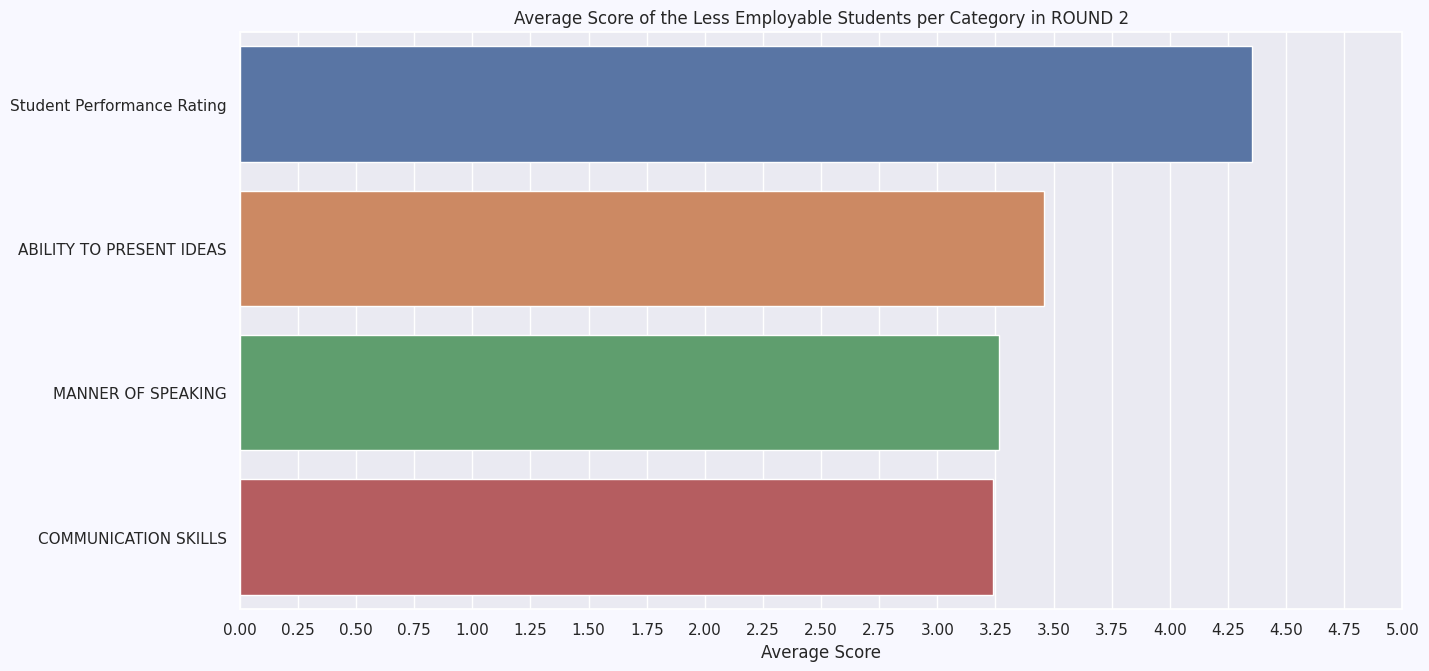

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y = ave_skills_lemp_r2.index,
    x= 'Average Score',
    data = ave_skills_lemp_r2.sort_values(
        'Average Score',
        ascending = False
    )
)

plt.xticks(np.arange(0,5.25,0.25))
plt.title('Average Score of the Less Employable Students per Category in ROUND 2')
plt.show()

Finall employed student scores

In [ ]:
# Group instances with predicted value 1
grouped_emp_round2 = test_data[test_data["predicted"] == 1]

# Display the grouped instances
print(grouped_emp_round2)

      Student Performance Rating  ABILITY TO PRESENT IDEAS  \
2409                           5                         3   
1547                           5                         4   
881                            5                         5   
331                            4                         4   
2225                           5                         4   
...                          ...                       ...   
1032                           5                         5   
12                             5                         3   
422                            5                         3   
1868                           5                         4   
2622                           5                         3   

      MANNER OF SPEAKING  COMMUNICATION SKILLS  actual  predicted  
2409                   4                     3     1.0        1.0  
1547                   4                     4     0.0        1.0  
881                    5                     5     

In [ ]:
grouped_emp_round2["GENERAL APPEARANCE"] = df["GENERAL APPEARANCE"]
grouped_emp_round2["MENTAL ALERTNESS"] = df["MENTAL ALERTNESS"]
grouped_emp_round2["PHYSICAL CONDITION"] = df["PHYSICAL CONDITION"]
grouped_emp_round2["SELF-CONFIDENCE"] = df["SELF-CONFIDENCE"]
grouped_emp_round2

<ipython-input-145-3d456c24d6d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_emp_round2["GENERAL APPEARANCE"] = df["GENERAL APPEARANCE"]
<ipython-input-145-3d456c24d6d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_emp_round2["MENTAL ALERTNESS"] = df["MENTAL ALERTNESS"]
<ipython-input-145-3d456c24d6d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Student Performance Rating,ABILITY TO PRESENT IDEAS,MANNER OF SPEAKING,COMMUNICATION SKILLS,actual,predicted,GENERAL APPEARANCE,MENTAL ALERTNESS,PHYSICAL CONDITION,SELF-CONFIDENCE
2409,5,3,4,3,1.0,1.0,4,3,4,3
1547,5,4,4,4,0.0,1.0,4,4,4,4
881,5,5,5,5,0.0,1.0,5,5,5,5
331,4,4,4,4,0.0,1.0,5,3,4,3
2225,5,4,4,4,0.0,1.0,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...
1032,5,5,5,3,1.0,1.0,5,5,5,5
12,5,3,3,2,0.0,1.0,4,2,3,3
422,5,3,3,3,1.0,1.0,4,3,3,3
1868,5,4,4,4,0.0,1.0,4,4,4,3


In [ ]:
ave_skills_emp = pd.DataFrame({ 'Average Score' : grouped_emp_round2.mean() })
ave_skills_emp

,Average Score
Student Performance Rating,4.699187
ABILITY TO PRESENT IDEAS,3.880081
MANNER OF SPEAKING,3.985772
COMMUNICATION SKILLS,3.601626
actual,0.660569
predicted,1.000000
GENERAL APPEARANCE,4.280488
MENTAL ALERTNESS,4.030488
PHYSICAL CONDITION,4.048780
SELF-CONFIDENCE,3.981707


In [ ]:
ave_skills_emp = ave_skills_emp.drop(index = ['actual'], axis = 0)
ave_skills_emp = ave_skills_emp.drop(index = ['predicted'], axis = 0)

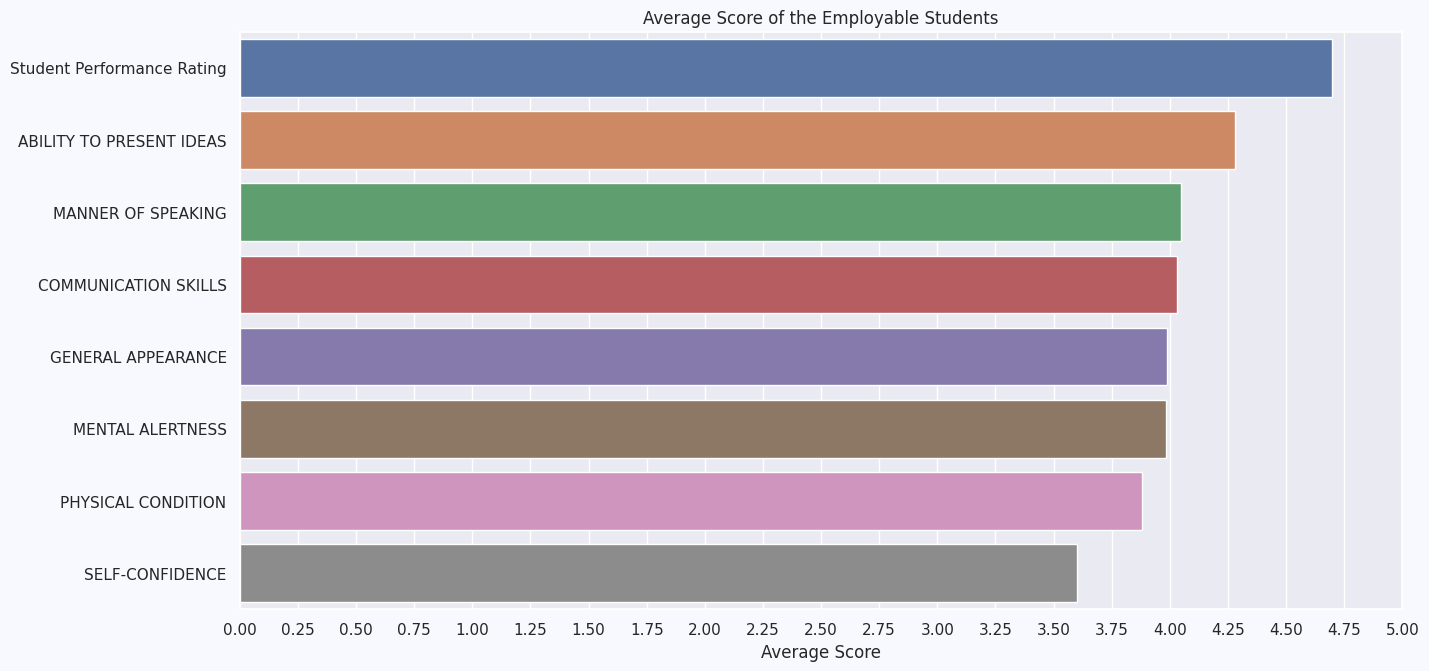

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y = ave_skills_emp.index,
    x= 'Average Score',
    data = ave_skills_emp.sort_values(
        'Average Score',
        ascending = False
    )
)

plt.xticks(np.arange(0,5.25,0.25))
plt.title('Average Score of the Employable Students')
plt.show()